In [1]:
import gym
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines.common.policies import MlpPolicy

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
import pandas as pd
df = pd.read_csv('data/prices.csv')
print(df)

                       date symbol        open       close         low  \
0       2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998   
1       2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002   
2       2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000   
3       2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000   
4       2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996   
...                     ...    ...         ...         ...         ...   
851259           2016-12-30    ZBH  103.309998  103.199997  102.849998   
851260           2016-12-30   ZION   43.070000   43.040001   42.689999   
851261           2016-12-30    ZTS   53.639999   53.529999   53.270000   
851262  2016-12-30 00:00:00    AIV   44.730000   45.450001   44.410000   
851263  2016-12-30 00:00:00    FTV   54.200001   53.630001   53.389999   

              high     volume  
0       126.250000  2163600.0  
1       125.540001  2386400.0  
2       119.739

In [3]:
df2 = df.where(df['symbol']=='DAL')
mask = df['symbol']=='WLTW'
pos = np.flatnonzero(mask)
wltw = df.iloc[pos]
wltw

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
246,2016-12-23 00:00:00,WLTW,123.089996,124.489998,122.709999,124.660004,361900.0
247,2016-12-27 00:00:00,WLTW,124.570000,124.279999,124.010002,124.900002,382900.0
248,2016-12-28 00:00:00,WLTW,124.300003,122.379997,121.900002,124.300003,429900.0
249,2016-12-29 00:00:00,WLTW,122.449997,122.169998,121.599998,123.070000,216600.0


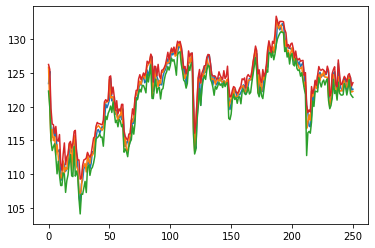

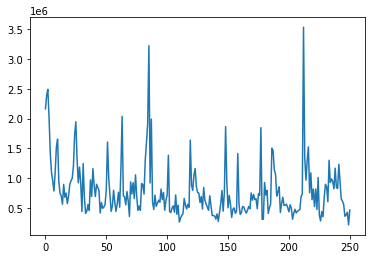

In [4]:
plt.plot(wltw['open'])
plt.plot(wltw['close'])
plt.plot(wltw['low'])
plt.plot(wltw['high'])
plt.show()
plt.plot(wltw['volume'])
plt.show()

In [5]:
def train_A2C(env_train, model_name, timesteps=25000):
    """A2C model"""

    start = time.time()
    model = A2C('MlpPolicy', env_train, verbose=0)
    model.learn(total_timesteps=timesteps)
    end = time.time()

    model.save(f"{config.TRAINED_MODEL_DIR}/{model_name}")
    print('Training time (A2C): ', (end - start) / 60, ' minutes')
    return model



In [6]:
date_dict = {}
for row in df.iloc():
    date = row['date'].split(' ')[0]
    if date in date_dict.keys():
        date_dict[date].append(row[1:].to_dict())
    else:
        date_dict[date] = [row[1:].to_dict()]

names = list(df['symbol'].unique())
for date in date_dict:
    stocks = [ stock['symbol'] for stock in date_dict[date] ]
    for name in names:
        if name not in stocks:
            date_dict[date].append({
                'symbol': name,
                'open': 0.0, 
                'close': 0.0, 
                'low': 0.0, 
                'high': 0.0, 
                'volume': 0.0
                })


KeyboardInterrupt: 

In [ ]:
names = list(df['symbol'].unique())
for date in date_dict:
    stocks = [ stock['symbol'] for stock in date_dict[date] ]
    for name in names:
        if name not in stocks:
            date_dict[date].append({
                'symbol': name,
                 'open': 1.0, 
                 'close': 1.0, 
                 'low': 1.0, 
                 'high': 1.0, 
                 'volume': 0.0
                })


In [1]:
#print(list(df['symbol'].unique()))
#print(np.ones(5))
#print(date_dict['2010-01-05'])


In [1]:
from market_sim import MarketEnv
from stable_baselines.common.env_checker import check_env
from preprocessing import envByDates

x = envByDates()
print(x[0])
env = MarketEnv(envByDates=x)
print(env.portfolio_size)
check_env(env, warn=True)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

['2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28', '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-16', '2016-02-17', '2016-02-18', '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-07', '2016-03-08', '2016-03-09', '2016

AssertionError: The observation returned by `reset()` method must be a numpy array

In [1]:
from stable_baselines.common.policies import MlpPolicy, CnnPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C
from market_sim import MarketEnv
from preprocessing import envByDates
import tensorflow


x = envByDates()
env = MarketEnv(envByDates=x)
model = A2C(MlpPolicy, env)
model.learn(total_timesteps=25000)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




In [2]:
obs = env.reset()
for i in range(100):
    action, _states = model.predict(obs)
    print(action)
    obs, rewards, dones, info = env.step(action)
    env.render()
print(env.asset_memory)
print(env.rewards_memory)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan